In [1]:
%matplotlib inline 
import numpy as np
import emcee
import matplotlib.pyplot as pl
from matplotlib.pyplot import cm 
import matplotlib.mlab as mlab

In [2]:
def q(a,b,c,x):
    quad = a*x**2. + b*x + c
    return quad

In [3]:
x = np.linspace(-1,1,101)

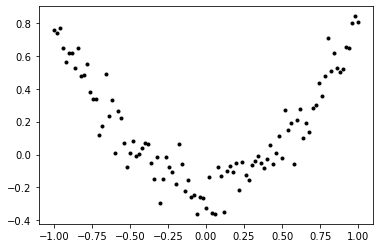

In [4]:
quad = q(1.,0.,-0.2,x)
noise = np.random.normal(0.0, 0.1, quad.shape)
noisy = quad + noise
pl.plot (x,noisy,"k.")
pl.show()

In [5]:
nwalkers = 20
niter = 10
init_dist = [(-2.,0.),(-0.5,0.5),(-0.5,0.)]
ndim = len(init_dist)
sigma = 0.1

In [6]:
priors = [(-4.,4.),(-1.,1.),(-1.,1.)]

In [7]:
def rpars(init_dist):
    return [np.random.rand() * (i[1]-i[0]) + i[0] for i in init_dist]

In [8]:
def lnprior(priors, values):
    
    lp = 0.
    for value, prior in zip(values, priors):
        if value >= prior[0] and value <= prior[1]:
            lp+=0
        else:
            lp+=-np.inf 
    return lp

In [9]:
def lnprob(z):
    
    lnp = lnprior(priors,z)
    if not np.isfinite(lnp):
            return -np.inf

    # make a model using the values the sampler generated
    model = q(z[0],z[1],z[2],x)

    # use chi^2 to compare the model to the data:
    chi2 = 0.
    for i in range (len(x)):
            chi2+=((noisy[i]-model[i])**2)/(sigma**2)

    # calculate lnp
    lnprob = -0.5*chi2 + lnp

    return lnprob

In [10]:
from scipy.stats import norm
def run(init_dist, nwalkers, niter, ndim):

    # Generate initial guesses for all parameters for all chains
    p0 = np.array([rpars(init_dist) for i in range(nwalkers)])

    # Generate the emcee sampler. Here the inputs provided include the 
    # lnprob function. With this setup, the first parameter
    # in the lnprob function is the output from the sampler (the paramter 
    # positions).
    sampler = emcee.EnsembleSampler(nwalkers,ndim,lnprob)

    pos, prob, state = sampler.run_mcmc(p0, niter)

    for i in range(ndim):
        pl.figure()
        y = sampler.flatchain[:,i]
        n, bins, patches = pl.hist(y, 200, density=1, color="b", alpha=0.45)
        pl.title("Dimension {0:d}".format(i))
        
        mu = np.average(y)
        sigma = np.std(y)       
        print ("mu,", "sigma = ", mu, sigma)

        bf = norm.pdf(bins, mu, sigma)
        l = pl.plot(bins, bf, 'k--', linewidth=2.0)

    pl.show()
    return pos

mu, sigma =  -0.27866086712418026 0.6778071508842881
mu, sigma =  -0.054345977003308794 0.29255249226761254
mu, sigma =  -0.27382187956193976 0.16387272235821398


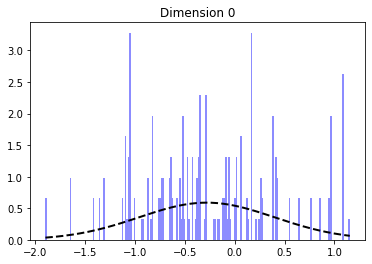

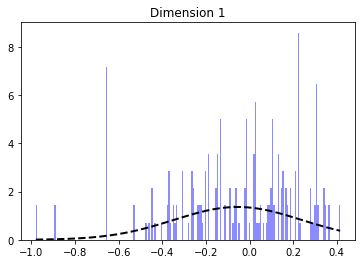

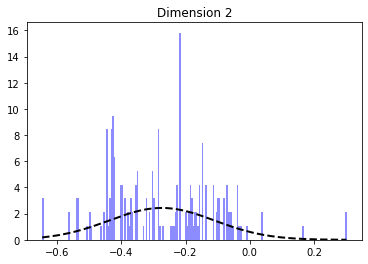

In [11]:
niter=10
pos = run(init_dist, nwalkers, niter, ndim)

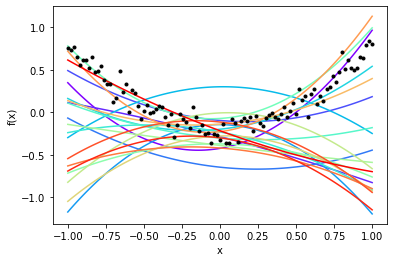

In [12]:
color=cm.rainbow(np.linspace(0,1,nwalkers))
for i,c in zip(range(nwalkers),color):
    
    model = pos[-1-i,0]*x**2 + pos[-1-i,1]*x + pos[-1-i,2]
    
    pl.plot(x,model,c=c)
    
pl.plot(x,noisy,"k.")
pl.xlabel("x")
pl.ylabel("f(x)")
pl.show()

mu, sigma =  1.0053804206916255 0.08564767803165459
mu, sigma =  0.0028411545463308996 0.02427392783338769
mu, sigma =  -0.18971560330842982 0.019665841071687597


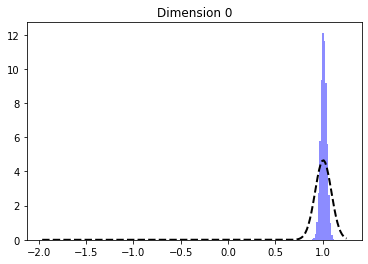

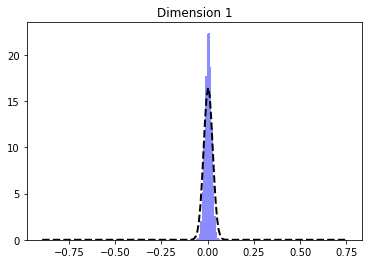

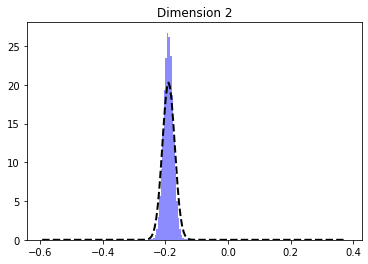

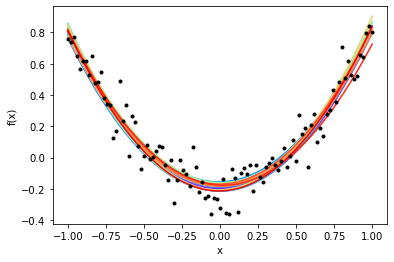

In [13]:
niter = 10000

pos = run(init_dist, nwalkers, niter, ndim)

color=cm.rainbow(np.linspace(0,1,nwalkers))
for i,c in zip(range(nwalkers),color):
    
    model = pos[-1-i,0]*x**2 + pos[-1-i,1]*x + pos[-1-i,2]
    
    pl.plot(x,model,c=c)
    
pl.plot(x,noisy,"k.")
pl.xlabel("x")
pl.ylabel("f(x)")
pl.show()